* The dataset contains 3 animal: cat, dog, and wild
* Source dataset: https://www.kaggle.com/andrewmvd/animal-faces

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
import matplotlib.image as implt
from PIL import Image
import seaborn as sns
import cv2 as cs2
import os
import shutil
import random
import os.path
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
## import Keras and its module for image processing and model building
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers

# Process the data 

The dataset came with only two divisions: a training dataset and a test dataset, in different folders.
However, we would also need a third division: a validation dataset in which we would train against before testing the final accuracy on the test dataset. This would allow us to avoid overfitting due to training samples in the dataset that we used to test.

We also need to shuffle the wild dataset into the new validation folder, because it seems that the images are not ramdomly distributed there (there seems to be some rough division according to each wild species, such as foxes, tigers, leons, and so on.)



In [3]:
original_dataset_dir = r'C:\Users\Pedro\Documents\Python Scripts\cv_animalfaces\input\animal-faces\all'

base_dir = r'C:\Users\Pedro\Documents\Python Scripts\cv_animalfaces\input'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
train_dogs_dir = os.path.join(train_dir, 'wild')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
train_dogs_dir = os.path.join(validation_dir, 'wild')
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')
train_dogs_dir = os.path.join(test_dir, 'wild')

In [4]:
os.mkdir(base_dir)
os.mkdir(train_dir)
os.mkdir(validation_dir)
os.mkdir(test_dir)
os.mkdir(train_cats_dir)
os.mkdir(train_dogs_dir)
os.mkdir(train_dogs_dir)
os.mkdir(validation_cats_dir)
os.mkdir(validation_dogs_dir)
os.mkdir(train_dogs_dir)
os.mkdir(test_cats_dir)
os.mkdir(test_dogs_dir)
os.mkdir(train_dogs_dir)

FileExistsError: [WinError 183] Não é possível criar um arquivo já existente: 'C:\\Users\\Pedro\\Documents\\Python Scripts\\cv_animalfaces\\input'

In [8]:
src_cat = os.path.join(original_dataset_dir, 'cat')
src_cat_imgs = (os.listdir(src_cat))

src_dog = os.path.join(original_dataset_dir, 'dog')
src_dog_imgs = (os.listdir(src_dog))

src_wild = os.path.join(original_dataset_dir, 'wild')
src_wild_imgs = (os.listdir(src_wild))

def valid_path(dir_path, filename):
    full_path = os.path.join(dir_path, filename)
    return os.path.isfile(full_path)

In [9]:
print(f'Cat images:{len(src_cat_imgs)}')
print(f'Dog images:{len(src_dog_imgs)}')
print(f'Wild images:{len(src_wild_imgs)}')

Cat images:2
Dog images:2
Wild images:2


## Move files into respective directories

We will split the dataset in the following ratio:
1. Training dataset 70%
2. Validation dataset 15%
3. Test dataset 15%

In [10]:
# Test

cat_files = [os.path.join(src_cat, f) for f in src_cat_imgs if valid_path(src_cat, f)]
choices = random.sample(cat_files, int(len(src_cat_imgs)*0.15)) # 15%
test_cat = r'C:\Users\Pedro\Documents\Python Scripts\cv_animalfaces\input\test\cats'
for files in choices:
    shutil.move(files, test_cat)

dog_files = [os.path.join(src_dog, f) for f in src_dog_imgs if valid_path(src_dog, f)]
choices = random.sample(dog_files, int(len(src_dog_imgs)*0.15))
test_dog = r'C:\Users\Pedro\Documents\Python Scripts\cv_animalfaces\input\test\dogs'
for files in choices:
    shutil.move(files, test_dog)

wild_files = [os.path.join(src_wild, f) for f in src_wild_imgs if valid_path(src_wild, f)]
choices = random.sample(wild_files, int(len(src_wild_imgs)*0.15))
test_wild = r'C:\Users\Pedro\Documents\Python Scripts\cv_animalfaces\input\test\wild'
for files in choices:
    shutil.move(files, test_wild)

In [11]:
# Validation

cat_files = [os.path.join(src_cat, f) for f in src_cat_imgs if valid_path(src_cat, f)]
choices = random.sample(cat_files, int(len(src_cat_imgs)*0.15)) # 15%
val_cat = r'C:\Users\Pedro\Documents\Python Scripts\cv_animalfaces\input\validation\cats'
for files in choices:
    shutil.move(files, val_cat)

dog_files = [os.path.join(src_dog, f) for f in src_dog_imgs if valid_path(src_dog, f)]
choices = random.sample(dog_files, int(len(src_dog_imgs)*0.15))
val_dog = r'C:\Users\Pedro\Documents\Python Scripts\cv_animalfaces\input\validation\dogs'
for files in choices:
    shutil.move(files, val_dog)

wild_files = [os.path.join(src_wild, f) for f in src_wild_imgs if valid_path(src_wild, f)]
choices = random.sample(wild_files, int(len(src_wild_imgs)*0.15))
val_wild = r'C:\Users\Pedro\Documents\Python Scripts\cv_animalfaces\input\validation\wild'
for files in choices:
    shutil.move(files, val_wild)

In [12]:
# Training

cat_files = [os.path.join(src_cat, f) for f in src_cat_imgs if valid_path(src_cat, f)]
choices = random.sample(cat_files, int(len(src_cat_imgs)*0.70)) # 70%
train_cat = r'C:\Users\Pedro\Documents\Python Scripts\cv_animalfaces\input\train\cats'
for files in choices:
    shutil.move(files, train_cat)

dog_files = [os.path.join(src_dog, f) for f in src_dog_imgs if valid_path(src_dog, f)]
choices = random.sample(dog_files, int(len(src_dog_imgs)*0.70))
train_dog = r'C:\Users\Pedro\Documents\Python Scripts\cv_animalfaces\input\train\dogs'
for files in choices:
    shutil.move(files, train_dog)

wild_files = [os.path.join(src_wild, f) for f in src_wild_imgs if valid_path(src_wild, f)]
choices = random.sample(wild_files, int(len(src_wild_imgs)*0.70))
train_wild = r'C:\Users\Pedro\Documents\Python Scripts\cv_animalfaces\input\train\wild'
for files in choices:
    shutil.move(files, train_wild)

In [13]:
test_cat = r'C:\Users\Pedro\Documents\Python Scripts\cv_animalfaces\input\test\cats'
test_dog = r'C:\Users\Pedro\Documents\Python Scripts\cv_animalfaces\input\test\dogs'
test_wild = r'C:\Users\Pedro\Documents\Python Scripts\cv_animalfaces\input\test\wild'
val_cat = r'C:\Users\Pedro\Documents\Python Scripts\cv_animalfaces\input\validation\cats'
val_dog = r'C:\Users\Pedro\Documents\Python Scripts\cv_animalfaces\input\validation\dogs'
val_wild = r'C:\Users\Pedro\Documents\Python Scripts\cv_animalfaces\input\validation\wild'
train_cat = r'C:\Users\Pedro\Documents\Python Scripts\cv_animalfaces\input\train\cats'
train_dog = r'C:\Users\Pedro\Documents\Python Scripts\cv_animalfaces\input\train\dogs'
train_wild = r'C:\Users\Pedro\Documents\Python Scripts\cv_animalfaces\input\train\wild'

In [14]:
print('total test cat images:', len(os.listdir(test_cat)))
print('total test dog images:', len(os.listdir(test_dog)))
print('total test wild images:', len(os.listdir(test_wild)))
print('=============================')
print('total validation cat images:', len(os.listdir(val_cat)))
print('total validation dog images:', len(os.listdir(val_dog)))
print('total validation wild images:', len(os.listdir(val_wild)))
print('=============================')
print('total training cat images:', len(os.listdir(train_cat)))
print('total training cat images:', len(os.listdir(train_cat)))
print('total training cat images:', len(os.listdir(train_cat)))

total test cat images: 847
total test dog images: 785
total test wild images: 785
total validation cat images: 847
total validation dog images: 785
total validation wild images: 785
total training cat images: 3958
total training cat images: 3958
total training cat images: 3958


Because we need to classify our samples into one of three classes, we have a **multiclass classification** problem.

# Data augmentation

In [16]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

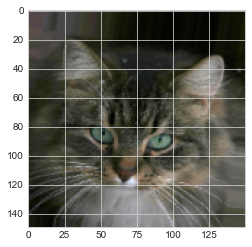

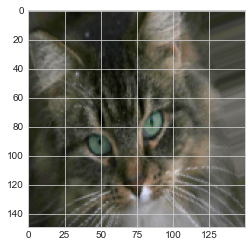

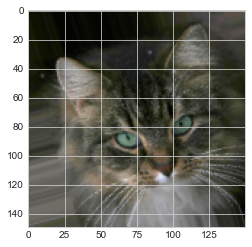

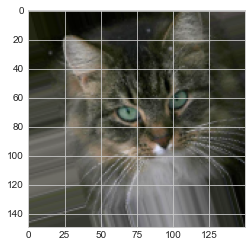

In [17]:
fnames = [os.path.join(train_cats_dir, fname) for
fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

# Build the model

In [18]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (32, 150, 150, 3)
labels batch shape: (32, 3)


In [19]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

model.compile(optimizer=optimizers.RMSprop(lr=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [22]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [23]:
# Apply data augmentation to the train dataset (not to the validation dataset though)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

Found 11293 images belonging to 3 classes.
Found 2417 images belonging to 3 classes.


In [24]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size

In [25]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=STEP_SIZE_TRAIN,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=STEP_SIZE_VALID)

Epoch 1/30
352/352 [==============================] - 1278s 4s/step - loss: 0.9124 - acc: 0.5521 - val_loss: 0.6829 - val_acc: 0.6950
Epoch 2/30
352/352 [==============================] - 1193s 3s/step - loss: 0.7328 - acc: 0.6703 - val_loss: 0.5282 - val_acc: 0.7971
Epoch 3/30
352/352 [==============================] - 1199s 3s/step - loss: 0.6422 - acc: 0.7191 - val_loss: 0.4723 - val_acc: 0.8029
Epoch 4/30
352/352 [==============================] - 1195s 3s/step - loss: 0.5715 - acc: 0.7625 - val_loss: 0.7931 - val_acc: 0.7429
Epoch 5/30
352/352 [==============================] - 1192s 3s/step - loss: 0.5211 - acc: 0.7880 - val_loss: 0.5436 - val_acc: 0.8104
Epoch 6/30
352/352 [==============================] - 1191s 3s/step - loss: 0.4811 - acc: 0.8050 - val_loss: 0.3988 - val_acc: 0.8654
Epoch 7/30
352/352 [==============================] - 1190s 3s/step - loss: 0.4527 - acc: 0.8191 - val_loss: 0.2918 - val_acc: 0.8942
Epoch 8/30
352/352 [==============================] - 1206s 3s

In [26]:
model.save('model_generator_dropout_augmenepoch30.h5')

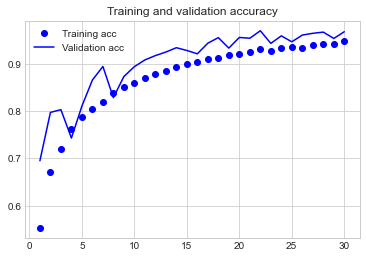

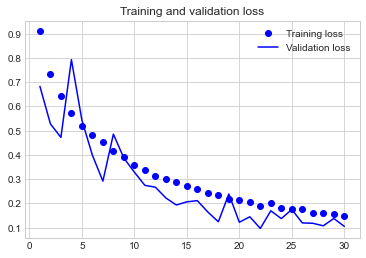

In [27]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Using a pretrained convnet

In [28]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

In [29]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [30]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

In [31]:
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 11293 images belonging to 3 classes.
Found 2417 images belonging to 3 classes.
Found 2417 images belonging to 3 classes.


In [32]:
with open('train_features','wb') as data_file:
     pickle.dump(train_features, data_file)
with open('train_labels','wb') as data_file:
     pickle.dump(train_labels, data_file)     
        
with open('validation_features','wb') as data_file:
     pickle.dump(validation_features, data_file)
with open('validation_labels','wb') as data_file:
     pickle.dump(validation_features, data_file)

with open('test_features','wb') as data_file:
     pickle.dump(train_features, data_file)
with open('test_labels','wb') as data_file:
     pickle.dump(train_labels, data_file)       

In [33]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

In [34]:
conv_base.trainable = True

In [35]:
print('This is the number of trainable weights '
'before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30


In [36]:
conv_base.trainable = False

In [37]:
print('This is the number of trainable weights '
'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 771       
Total params: 16,812,867
Trainable params: 2,098,179
Non-trainable params: 14,714,688
_________________________________________________________________


In [39]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical')

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['acc'])

STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size

history = model.fit_generator(
    train_generator,
    steps_per_epoch=STEP_SIZE_TRAIN,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=STEP_SIZE_VALID)

Found 11293 images belonging to 3 classes.
Found 2417 images belonging to 3 classes.
Epoch 1/30
564/564 [==============================] - 6175s 11s/step - loss: 0.2666 - acc: 0.9035 - val_loss: 0.0979 - val_acc: 0.9617
Epoch 2/30
564/564 [==============================] - 6030s 11s/step - loss: 0.1664 - acc: 0.9368 - val_loss: 0.0876 - val_acc: 0.9667
Epoch 3/30
564/564 [==============================] - 6001s 11s/step - loss: 0.1368 - acc: 0.9479 - val_loss: 0.0570 - val_acc: 0.9804
Epoch 4/30
564/564 [==============================] - 5946s 11s/step - loss: 0.1259 - acc: 0.9533 - val_loss: 0.0548 - val_acc: 0.9787
Epoch 5/30
564/564 [==============================] - 5940s 11s/step - loss: 0.1137 - acc: 0.9577 - val_loss: 0.0682 - val_acc: 0.9746
Epoch 6/30
564/564 [==============================] - 6016s 11s/step - loss: 0.1118 - acc: 0.9595 - val_loss: 0.0561 - val_acc: 0.9771
Epoch 7/30
564/564 [==============================] - 5931s 11s/step - loss: 0.1146 - acc: 0.9576 - val_l

In [40]:
model.save('model_pretrained_convnet_epoch30.h5')

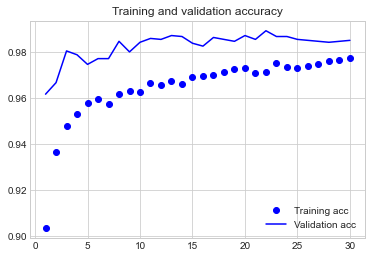

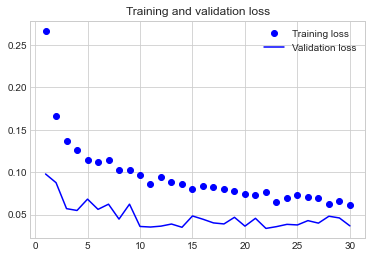

In [41]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()